# Polynomial Regression

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

## Goal


To predict the amount of salary for 6.5 level of experience



## Python imports

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


## Read the Datasets

In [8]:
datasets = pd.read_csv('Position_Salaries.csv')

In [9]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [10]:
datasets.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
datasets.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [15]:
# Seperate the datasets
Y = datasets.iloc[:,2:].values
Y[:5]

array([[ 45000],
       [ 50000],
       [ 60000],
       [ 80000],
       [110000]])

In [27]:
X = datasets.iloc[:,1:2].values

In [28]:
X[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

## Fit the model

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [30]:
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Salary')

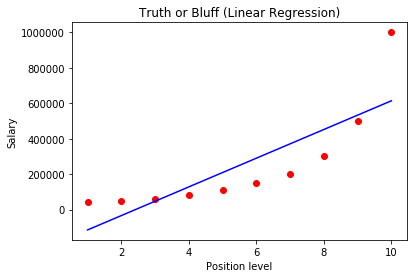

In [31]:
# Visualising the Linear Regression results
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
#plt.show()

The above data is not fitted well. We will add the Polynomial degree to predict this values.

In [32]:
# Fitting the Polynomial Regression to the datasets
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X)

In [33]:
x_poly

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02],
       [  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29600000e+03],
       [  1.00000000e+00,   7.00000000e+00,   4.90000000e+01,
          3.43000000e+02,   2.40100000e+03],
       [  1.00000000e+00,   8.00000000e+00,   6.40000000e+01,
          5.12000000e+02,   4.09600000e+03],
       [  1.00000000e+00,   9.00000000e+00,   8.10000000e+01,
          7.29000000e+02,   6.56100000e+03],
       [  1.00000000e+00,   1.0000000

In [34]:
poly_reg.fit(x_poly,Y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [35]:
# Take another instance for the linearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Salary')

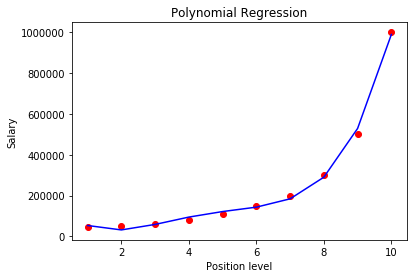

In [36]:
# Visualize the Polynomial Regression Data
plt.scatter(X,Y,color='red')
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title("Polynomial Regression")
plt.xlabel('Position level')
plt.ylabel('Salary')

We can observe the difference between the linear Regression and Polynomial Regression from the above 2 pictures.


## Prediction

In [38]:
lin_reg.predict([[6.5]])

array([[ 330378.78787879]])

In [39]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([[ 158862.45265155]])


## FINISH